In [1]:
import numpy as np 
import pandas as pd 
import math

In [2]:
df=pd.read_csv('abalone.csv')


In [3]:
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

In [5]:
df['Sex'] = df['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [6]:
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [27]:
y=np.array(df['Rings'])
X=np.array(df.drop('Rings', axis=1))

In [11]:
len(y)

4177

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  r2_score

for i in range(50):
    forest = RandomForestRegressor(n_estimators=i+1, random_state=1)
    forest=forest.fit(X, y)
    print(i+1, "forest.scoret: {:.3f}".format(forest.score(X,y)))


1 forest.scoret: 0.676
2 forest.scoret: 0.811
3 forest.scoret: 0.855
4 forest.scoret: 0.878
5 forest.scoret: 0.894
6 forest.scoret: 0.901
7 forest.scoret: 0.905
8 forest.scoret: 0.910
9 forest.scoret: 0.912
10 forest.scoret: 0.914
11 forest.scoret: 0.917
12 forest.scoret: 0.920
13 forest.scoret: 0.921
14 forest.scoret: 0.923
15 forest.scoret: 0.924
16 forest.scoret: 0.925
17 forest.scoret: 0.925
18 forest.scoret: 0.926
19 forest.scoret: 0.927
20 forest.scoret: 0.927
21 forest.scoret: 0.928
22 forest.scoret: 0.928
23 forest.scoret: 0.928
24 forest.scoret: 0.929
25 forest.scoret: 0.929
26 forest.scoret: 0.929
27 forest.scoret: 0.930
28 forest.scoret: 0.930
29 forest.scoret: 0.930
30 forest.scoret: 0.930
31 forest.scoret: 0.931
32 forest.scoret: 0.931
33 forest.scoret: 0.932
34 forest.scoret: 0.932
35 forest.scoret: 0.932
36 forest.scoret: 0.932
37 forest.scoret: 0.932
38 forest.scoret: 0.933
39 forest.scoret: 0.933
40 forest.scoret: 0.933
41 forest.scoret: 0.934
42 forest.scoret: 0.934
4

In [32]:
%%time
from sklearn import ensemble, cross_validation, metrics
scores=[]
kf = cross_validation.KFold(len(y), n_folds=5, random_state=1, shuffle=True)
for i in range(1,51):
    validation=[]
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        forest= RandomForestRegressor(n_estimators=i, random_state=1)
        forest.fit(X_train,y_train)
        validation.append(metrics.r2_score(y_test, regressor.predict(X_test)))
    scores.append(np.mean(validation))

CPU times: user 1min 6s, sys: 252 ms, total: 1min 6s
Wall time: 1min 6s


In [34]:
scores_52 = [scores.index(i) for i in scores if i>0.52]

In [35]:
scores_52

[21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

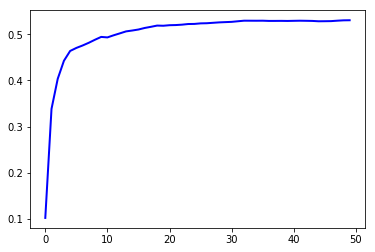

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(scores, 'b', linewidth=2)